In [1]:
import h5py
import numpy as np
from scipy.spatial.transform import Rotation
import matplotlib.pyplot as plt

In [36]:
data_path = "/data1/jessica/data/toyota/once_w_lanes_compressed_raw_small_multitask_all_train.hfd5" 
people_seqs = []
with h5py.File(data_path, "r") as f:
        for seq_key in list(f.keys()):
            iter_dict = {}
            keys_ = f[seq_key].keys()
            for key in keys_:
                ds_obj = f[seq_key][key][()]
                iter_dict[key] = ds_obj
            people_seqs.append(iter_dict)

In [16]:
def get_speed(vel):
    return np.sum(np.array(vel) ** 2) ** 0.5

def angle(v1, v2):
    # [0, np.pi]
    return np.arccos(np.dot(v1, v2) / (get_speed(v1) * get_speed(v2)))

def dist(p1, p2):
    return get_speed(np.array(p1) - np.array(p2))

In [44]:
#speed = distance / time 

for people_seq in people_seqs: 
    speeds = [-1]
    for i in range(1,len(people_seq['orig_times'])):# < 25# & people_seqs[0]['distance'] >=0
        time = people_seq['orig_times'][i]
        prev_time = people_seq['orig_times'][i-1]
        prev_time = people_seq['orig_times'][i-1]
        pos = people_seq['pos'][i][-3:]
        prev_pos = people_seq['pos'][i-1][-3:]
        speed = dist(pos, prev_pos)
        speed = speed/((time-prev_time)/60/60)
        speeds.append(speed)
    people_seq['speed'] = speeds

In [45]:
people_seqs[0]['speed']

[-1,
 29.373994434728505,
 35.18585113809953,
 36.361028913888184,
 39.617829792910165,
 39.28169837564165,
 37.41967667350598,
 35.06140253456835,
 21.903211905948293,
 14.250406560144596,
 17.180114754236946,
 26.833268379477616,
 35.16061991135779,
 38.33243692453463,
 37.77174789182058,
 38.5314423018401,
 40.425257594262774,
 38.41487577384114,
 31.008095024223113,
 22.755298594039342,
 14.856825668537425,
 5.937281759969425,
 0.04954223586511833,
 0.007472829908685216,
 0.3272542675673639,
 0.007779219785505162,
 0.006723653138830226,
 0.00787317312119397,
 0.006823499027346704,
 0.005517041923019959,
 0.0034114136447142124,
 0.004778734477844446,
 0.00993361012749496,
 0.008948087499445066,
 0.004495379777875748,
 0.004658890124709609,
 0.006481479142872372,
 0.007459754213399409,
 0.00811989968914273,
 0.005675116319079594,
 0.007485954928771432,
 0.012572253564280933,
 0.009392607411620325,
 0.010026904280773182,
 0.004274492211441255,
 0.007583597606230724,
 0.008670463559182

In [60]:
for people_seq in people_seqs: 
    m1 = np.array(people_seq['distance']  < 30)
    m2 = np.array(people_seq['distance'] >= 0)
    m3 = np.array(np.array(people_seq['speed']) > 5)
    mask = m1&m2&m3
    new_seqs = []
    last_i = 0
    for i, elem in enumerate(mask):
        if not elem:
            if i != last_i:
                new_seqs.append(mask[last_i:i])
                if len(mask[last_i:i]) > 40:
                    print(len(mask[last_i:i]))
            last_i = i+1


41
61
43
92
59
60
41
41
42
43
49
44
44
61
43
47
73
60


In [61]:
speeds

[-1,
 20.320966047073853,
 19.46252826862593,
 15.575848454518457,
 6.257535035983618,
 1.1416595228593134,
 0.0063282847365467515,
 0.010774880691970105,
 0.018304398076483822,
 0.009095502632000707,
 0.009329867085287453,
 0.01590816566294269,
 0.9666135017858569,
 6.186019175851709,
 14.819414022629255,
 19.868076828970974,
 20.632896138319854,
 23.597795273597693,
 25.143118734059485,
 23.655827866867945,
 25.252868846302263,
 24.980616051998034,
 23.986563408578085,
 21.423549305466405,
 19.196245325775447,
 19.106777518391304,
 23.827084362522204,
 23.672677337887873,
 28.326395579485226,
 27.495086499564422,
 25.410673369545915,
 23.405560787583156,
 20.972131899409987,
 8.6583745915842,
 0.006864416279738648,
 0.007881846366112581,
 0.0009104745958151461,
 0.0024812020633743965,
 0.004908697868520501,
 0.0028426089010399756,
 0.005210468809119399,
 0.0033529964463721485,
 0.0016434262209009101,
 0.00662690910532166,
 0.0021064045972430654,
 0.00522355316172106,
 0.0085675866185

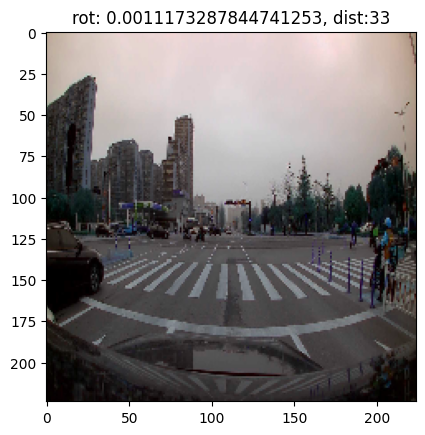

In [5]:
prev_rot = [0,0,0]
for elem in people_seqs:
    pos = elem['pos']
    image = elem["image_array"]
    dist = elem["distance"]
    for i in range(1, len(pos)):
        #p = pos[i] - pos[i-1]
        rotation = Rotation.from_quat(pos[i][:4]).as_euler('zyx', degrees=True)    
        prev_rotation = Rotation.from_quat(pos[i-1][:4]).as_euler('zyx', degrees=True)       
        plt.imshow(image[i-1])
        plt.title(f"rot: {(rotation-prev_rotation)[0]}, dist:{dist[i]}")
        plt.savefig(f"./images/{i-1}.png")
        prev_rot = rotation
        if i > 100: break
    break
    

In [52]:
people_seqs[0]['distance']

array([  7,  59,  -1,  42,  -1,  15,  13,  13,  13,  13,  13,  13,  13,
        13,  13,  13,  13,  13,  13,  11,   7,   3,  -1,  36,  19, 114,
        53,  75,  50,  29,  17,  16,  21,  24,  24, 101,  44,  27,  21,
        19,  18,  19,  22,  22,  22,  21,  20,  22,  24,  26,  24,  18,
        16,   9,   7,   6,   6,   6,   6,   6,   6,   6,   6,   6,   6,
         6,   6,   6,   6,   6,   6,   6,   3,   6,   6,  10,  20,  27,
        20,  18,  42,  29,  20,  22,  32,  25,  21,  18,  10,  25,  23,
        21,  20,  23,  23,  53,  24,  -1,  21,  19,  21,  33,  28,  48,
        88,  92, 152,  -1,  -1,  98,  92,  60,  71,  44,  48,  49,  46,
        18,  19,  30,  18,  23,  24,  17,  16,   7,   6,   6,   6,   6,
         6,   6,   6,   6,   6,   9,  15,  14,  16,  20,  24,  28,  28,
        20,  16,  11,   2,  38,  17,  19,  33,  33,  26,  30,  29,  27,
        18,  27,  25,  26,  19,  23,  19,  20,  22,   9,  11,   9,  10,
         8,   8,   7,   4,   4,   2,   4,   4,   4,   4,   4,   

In [28]:
rotation = Rotation.from_quat(pos[:4]).as_euler('zyx', degrees=True)

In [21]:
rotation[0]


-3.9987035835581395

In [5]:
angles = [list(seq["angle"]) for seq in people_seqs]

In [34]:
flat_list = np.array([item for sublist in angles for item in sublist])

In [35]:
mi = flat_list.min()
ma = flat_list.max()
rang = ma - mi

In [36]:
mi, ma, rang

(2.1073424e-08, 1.5222348, 1.5222348)

In [37]:
flat_list.sort()

In [39]:
np.median(flat_list)

0.00018448659

In [50]:
an_array = flat_list
mean = np.mean(an_array)
standard_deviation = np.std(an_array)
distance_from_mean = abs(an_array - mean)
max_deviations = 3
not_outlier = distance_from_mean < max_deviations * standard_deviation
no_outliers = an_array[not_outlier]

In [53]:
no_outliers.min(), no_outliers.max(), no_outliers.max()  - no_outliers.min()

(2.1073424e-08, 0.102598816, 0.102598794)